#### **Repaso teórico del PCA:**

El análisis de componentes principales es un mapeo del espacio original de alta dimensión de  *$d$*  variables de entrada a un subespacio de dimensiones inferiores de  *$k$* variables. La intención es minimizar la pérdida de información (maximizar la cantidad de variación en los datos explicada por los componentes principales, mientras se minimiza el número de componentes principales).


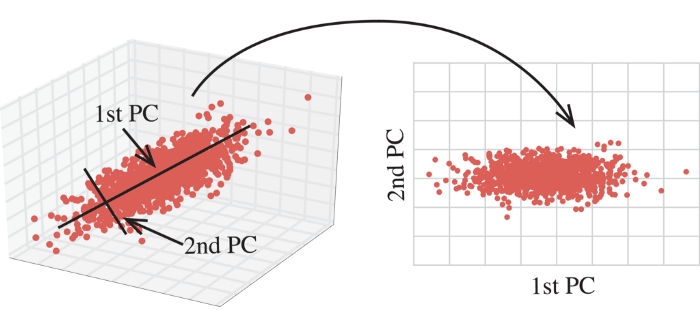


Es importante señalar que PCA es una técnica de reducción de dimensionalidad; no usa las salidas. El PCA se utiliza para reducir la dimensionalidad y, por lo tanto, se combina con otras técnicas de aprendizaje automático que pueden utilizar el conjunto de variables de entrada de dimensiones inferiores.

En términos de álgebra lineal, estamos proyectando un vector de entrada  **$X$** a un vector de entrada reducido  **$Z$**  usando una matriz de proyección  **$W$** :

**$$Z =W^TX$$**
 
La construcción de la matriz de proyección se basa en un problema de maximización: maximizar la varianza explicada por cada componente principal. El componente principal es **$W_1$** , un vector de longitud *$d$* , y es una combinación ponderada de variables de entrada que, después de que los datos se proyectan en **$W_1$**, distribuye los datos al máximo.

El problema de optimización se convierte entonces en: para una observación dada  *$i$* , maximiza la varianza del vector  **$Z_i$**, que es igual a:

$Var(Z_i) =W^T_iΣW_i$
 
mientras restringe la norma L2 de cada vector de proyección a 1,

**$W^T_iW_i= 1$**
 
Esto se reduce a unas pocas operaciones de álgebra lineal, que haremos a mano, y luego con el objeto PCA de scikit-learn.

## **Importación de librerias:**

In [26]:
#NumPy: Computación numérica
import numpy as np

#Scikit-learn: Aprendizaje a maquina
from sklearn.decomposition import PCA

#Matplotlib: Visualización de datos 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

#Pandas: Tratamiento de dataframes
import pandas as pd

#SciPy: Herramientas tratamiento de matrices, etc.
import scipy.io.matlab as matlab


#### **Generación de datos:** 


In [27]:
# Genero datos Gaussianos 3D
mean = [0,5,1]
cov = [[25,-1,7],[-1,4,-4],[7,-4,10]]
X = np.random.multivariate_normal(mean,cov,1000)
X[0:5]

array([[ 2.96641001,  3.32884084,  1.50177471],
       [ 4.26080956,  0.08881074,  5.46373143],
       [-5.82092658,  2.62269224,  2.29892115],
       [-0.90215237,  5.43520999,  1.7968327 ],
       [-2.22824559,  2.83524091,  3.44069411]])

In [28]:
df = pd.DataFrame(X, columns={'x','y','z'})
df = df[['x','y','z']]
df.head(6)

,x,y,z
0,1.501775,3.328841,2.966410
1,5.463731,0.088811,4.260810
2,2.298921,2.622692,-5.820927
3,1.796833,5.435210,-0.902152
4,3.440694,2.835241,-2.228246
5,-0.706648,7.571805,1.104958


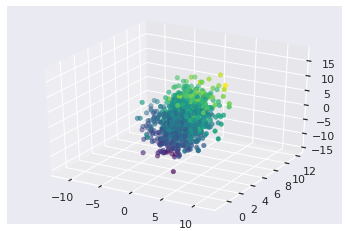

In [29]:
ax = plt.axes(projection='3d')
ax.scatter(df['x'],df['y'], df['z'], c=df['z'], cmap='viridis', linewidth=0.5)

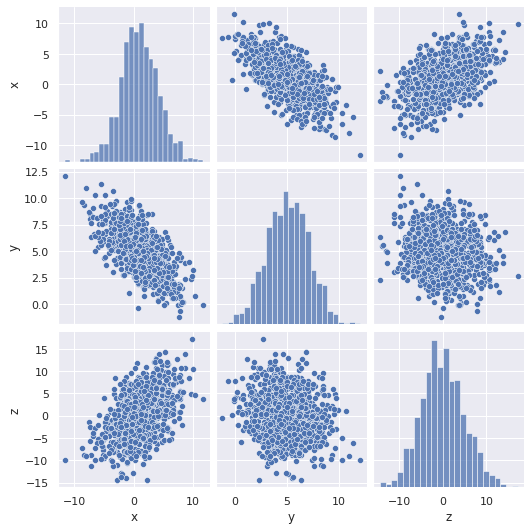

In [30]:
# Dibujamos los datos en parejas de ejes de proyección 
sns.pairplot(df)


In [53]:
def mypca(X,n_components=0):
    # Calcular valores propios y vectores propios de la matriz de covarianza a partir de datos X
    # D: valores propios, U: vectores propios, Y: Proyecciones
    from numpy import mean, cov, dot, linalg, argsort

    filas,columnas = X.shape
    # 1.- Restar la media:
    media = mean(X,axis=0)
    X -= media

    # 2.- Estimación de la matriz de covarianza 
    #Automatico:
    C_XX = cov(X.T)
    #Manual:
    # C_XX = (X - media).T.dot((X - media)) / (X.shape[0]-1)

    # 3.- Cálculo de la autodescomposición:
    D, U = linalg.eig(C_XX)

    # 4.- Ordenando por los valores propios de forma descendente:
    index = argsort(D)
    index = index[::-1]
    # ordenar los autovectores acorde con los autovalores ordenados:
    U = U[index]
    # Ordenando los autovalores de mayor a menor:
    D = D[index]

    # 5.- Seleccionamos tantas componentes como se predefina:
    if n_components < columnas and n_components > 0:
        D = D[:n_components] # Cortar algunas PC si es necesario
        U = U[:,:n_components]
        
    # Proyección de los datos X en el nuevo espacio
    Y = dot(X,U)
    return D,U,Y,media

In [54]:
# sklearn PCA
pca = PCA()
pca.fit(X)

U = pca.components_.T
D = pca.explained_variance_
media = pca.mean_
perc = pca.explained_variance_ratio_
Y = pca.transform(X)

print("----- PCA Scikit-Learn ------")
print("Datos en el espacio proyectado Y: " + str(Y.shape))
print("Valores propios: " + str(D))
print("Vectores propios: " + str(U))
print("Porcentaje de varianza explicada:" + str(perc))

# Mi PCA
D,U,Y,media=mypca(X,n_components=0)
perc = D/np.sum(D)
print("----- Mi PCA ------")
print("Datos en el espacio proyectado Y: " + str(Y.shape))
print("Valores propios: " + str(D))
print("Vectores propios: " + str(U))
print("Porcentaje de varianza explicada:" + str(perc))


----- PCA Scikit-Learn ------
Datos en el espacio proyectado Y: (1000, 3)
Valores propios: [28.34311953  8.85076838  1.61400659]
Vectores propios: [[ 0.90729748 -0.39983674  0.13016088]
 [-0.1197485  -0.54242133 -0.83152835]
 [ 0.40307762  0.73885701 -0.54001736]]
Porcentaje de varianza explicada:[0.73034417 0.22806618 0.04158965]
----- Mi PCA ------
Datos en el espacio proyectado Y: (1000, 3)
Valores propios: [28.34311953  8.85076838  1.61400659]
Vectores propios: [[ 0.90729748 -0.39983674 -0.13016088]
 [-0.1197485  -0.54242133  0.83152835]
 [ 0.40307762  0.73885701  0.54001736]]
Porcentaje de varianza explicada:[0.73034417 0.22806618 0.04158965]


# Bibliografía:



1.   https://www.cienciadedatos.net/documentos/py19-pca-python.html

